# Régression linéaire simple

Soit une distribution à deux variables quantitatives. La RLS (Régression Linéaire Simple) permet de montrer l'éventuelle relation fonctionnelle linéaire qui existerait entre une variable EXPLICATIVE (ou indépendante) x et une variable aléatoire À EXPLIQUER (ou dépendante) y.

Graphiquement, on représente cette éventuelle relation dans un plan muni d'un repère orthogonal. Les valeurs de la variable explicative figurent sur l'axe des abscisses et celles de la variable à expliquer sont représentées sur l'axe des ordonnées. L'ensemble des données apparaît sous la forme d'un nuage de points (autant de points que d'observations différentes, sauf s'il existe des observations strictement identiques).

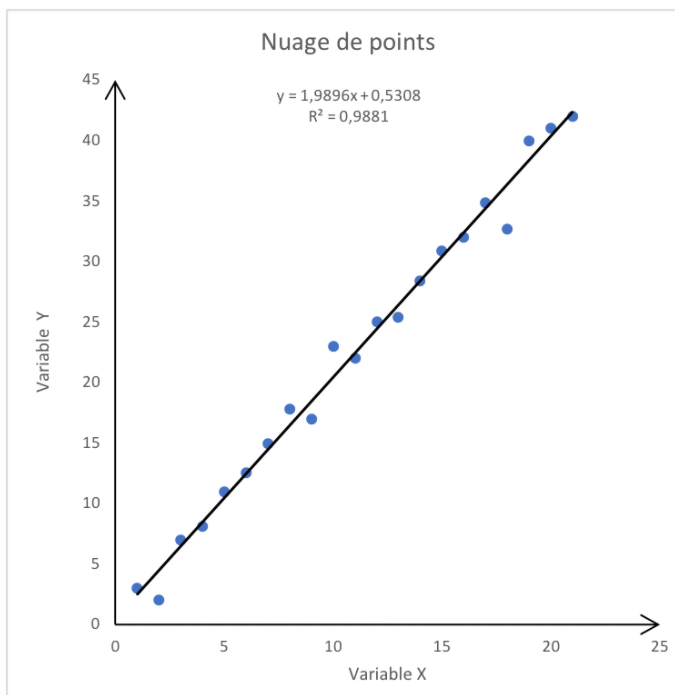

### Le dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
dataset = pd.read_csv("iris.csv")
    # On importe le data

In [3]:
dataset.head()
    # Visualiser les premieres 5 lignes

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.info()
    # 5 colonnes au total
    # pas de valeurs null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


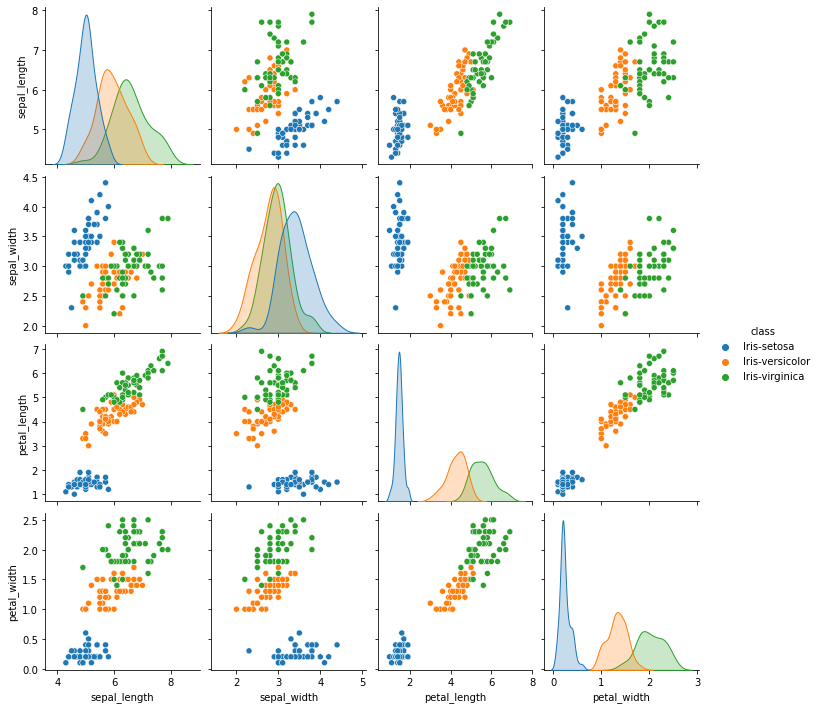

In [8]:
sns.pairplot(dataset, hue="class")
plt.show()
    # On verifie visualement les relations dans l'ensemble de données.

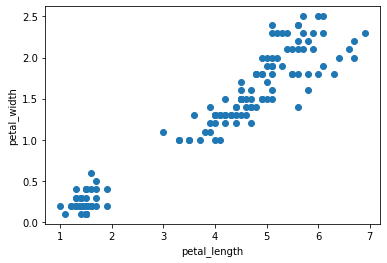

In [10]:
plt.plot(dataset["petal_length"], dataset["petal_width"], "o" )
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

### Équation de droite

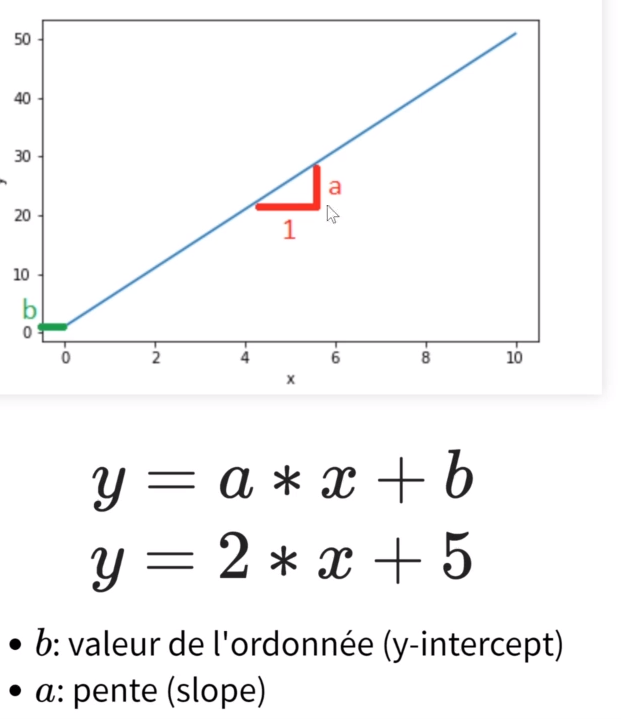



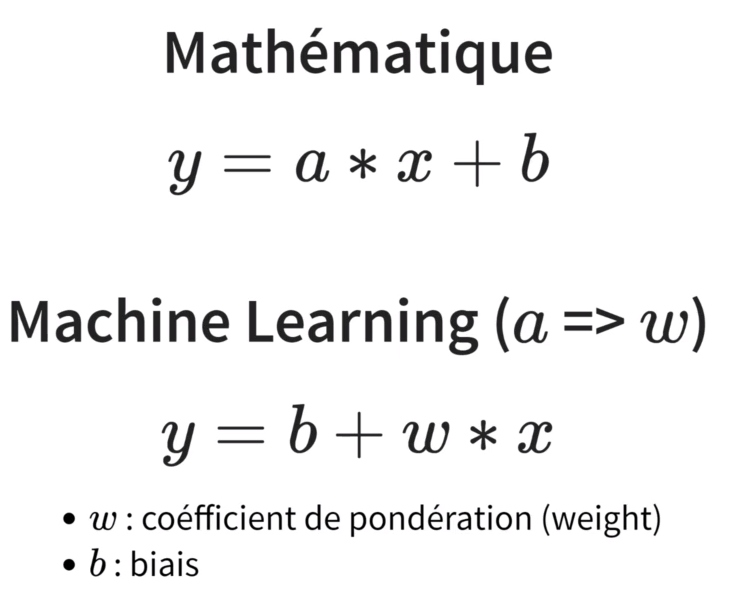

### Implémentation: équation de droite

In [19]:
w = 5
b = 6
x = 16

y = b + w*x
y

86

In [18]:
t =np.linspace(0, 10, 11)
    # linspace(): Renvoie des nombres régulièrement espacés sur un intervalle spécifié.
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [25]:
w = 5
b = 0
x = np.linspace(0, 10, 11)

y = b + w*x

print(x)
print(y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]


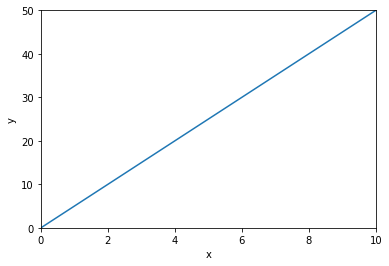

In [26]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,50])
plt.show()

# Droite optimale

In [27]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


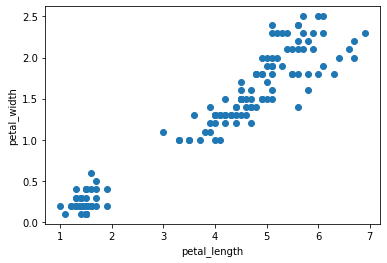

In [28]:
plt.plot(dataset["petal_length"], dataset["petal_width"], "o" )
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

In [29]:
w = 1
b = 1
x = 0
y = b + w*x
y

1

In [32]:
w = 1
b = 1
x = dataset['petal_length']
y = b + w*x
y

0      2.4
1      2.4
2      2.3
3      2.5
4      2.4
      ... 
145    6.2
146    6.0
147    6.2
148    6.4
149    6.1
Name: petal_length, Length: 150, dtype: float64

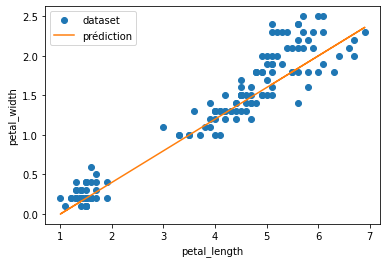

In [45]:
w = 0.40
b = -0.4
y = b + w*x

plt.plot(dataset["petal_length"], dataset["petal_width"], "o", label="dataset" )
plt.plot(x, y, label="prédiction")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()

In [48]:
y_predite = b + w * 5
y_predite

1.6

# Coéfficients optimaux

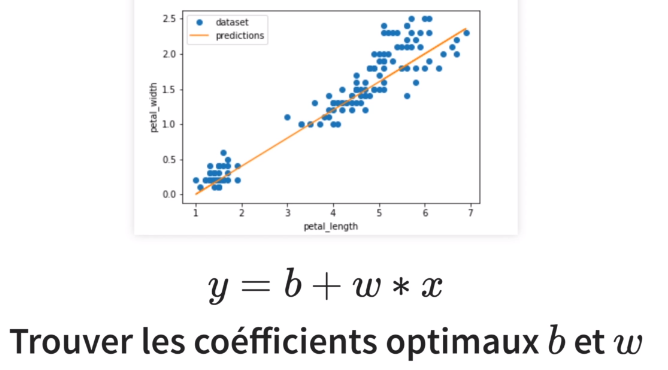

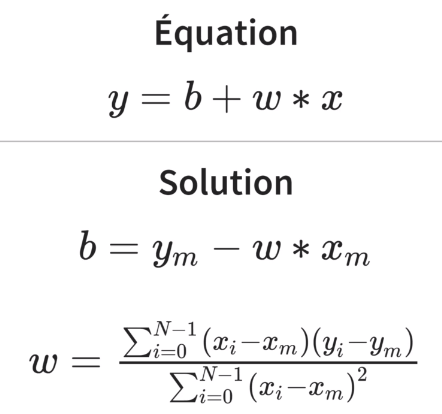

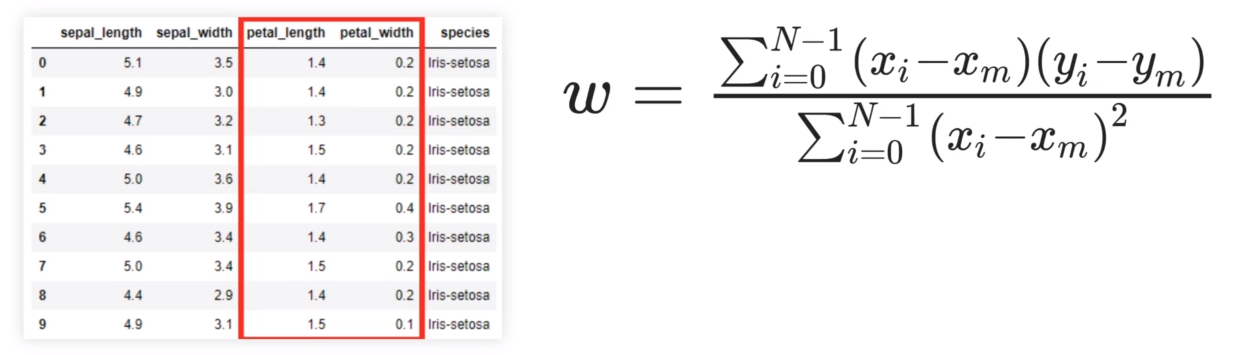

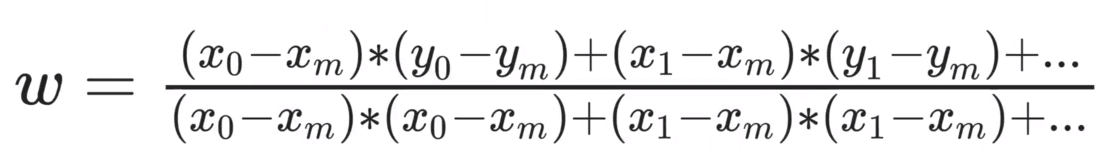

# Implémentation : coéfficients coéfficients 

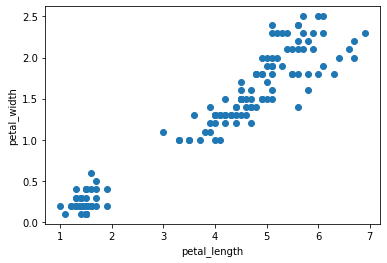

In [4]:
plt.plot(dataset["petal_length"], dataset["petal_width"], "o")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

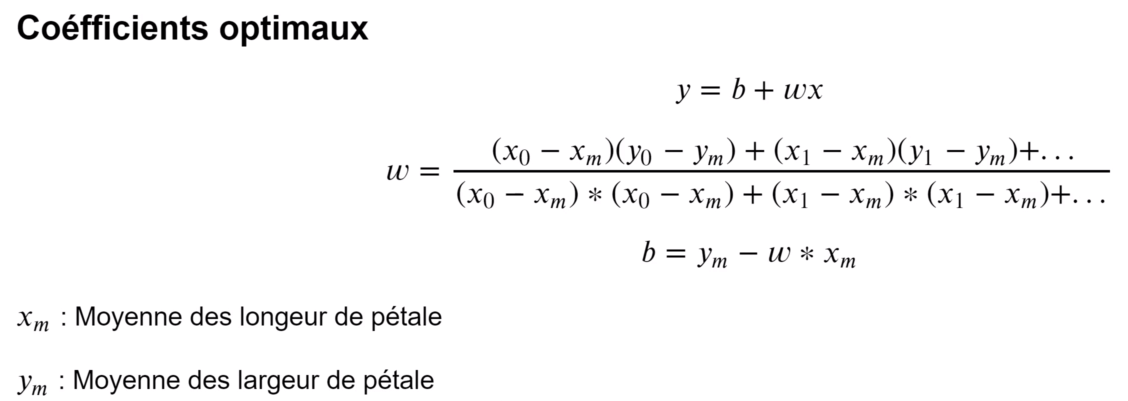

In [51]:
long_petale = dataset["petal_length"]

In [52]:
type(long_petale)

pandas.core.series.Series

In [53]:
long_petale = dataset["petal_length"].values

In [54]:
type(long_petale)

numpy.ndarray

In [55]:
long_petale

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [56]:
larg_petale = dataset["petal_width"].values

In [57]:
larg_petale

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [59]:
xm = 0
for v in long_petale:
    xm = xm + v #xm += v
xm

563.8000000000004

In [60]:
xm = xm/len(long_petale)
xm

3.7586666666666693

In [61]:
ym = 0
for v in larg_petale:
    ym = ym + v #ym += v
ym

179.8000000000001

In [62]:
ym = ym/len(larg_petale)
ym

1.1986666666666672

In [63]:
w_num = 0
w_den = 0

for xi, yi in zip(long_petale, larg_petale):
    print(xi,yi)

1.4 0.2
1.4 0.2
1.3 0.2
1.5 0.2
1.4 0.2
1.7 0.4
1.4 0.3
1.5 0.2
1.4 0.2
1.5 0.1
1.5 0.2
1.6 0.2
1.4 0.1
1.1 0.1
1.2 0.2
1.5 0.4
1.3 0.4
1.4 0.3
1.7 0.3
1.5 0.3
1.7 0.2
1.5 0.4
1.0 0.2
1.7 0.5
1.9 0.2
1.6 0.2
1.6 0.4
1.5 0.2
1.4 0.2
1.6 0.2
1.6 0.2
1.5 0.4
1.5 0.1
1.4 0.2
1.5 0.1
1.2 0.2
1.3 0.2
1.5 0.1
1.3 0.2
1.5 0.2
1.3 0.3
1.3 0.3
1.3 0.2
1.6 0.6
1.9 0.4
1.4 0.3
1.6 0.2
1.4 0.2
1.5 0.2
1.4 0.2
4.7 1.4
4.5 1.5
4.9 1.5
4.0 1.3
4.6 1.5
4.5 1.3
4.7 1.6
3.3 1.0
4.6 1.3
3.9 1.4
3.5 1.0
4.2 1.5
4.0 1.0
4.7 1.4
3.6 1.3
4.4 1.4
4.5 1.5
4.1 1.0
4.5 1.5
3.9 1.1
4.8 1.8
4.0 1.3
4.9 1.5
4.7 1.2
4.3 1.3
4.4 1.4
4.8 1.4
5.0 1.7
4.5 1.5
3.5 1.0
3.8 1.1
3.7 1.0
3.9 1.2
5.1 1.6
4.5 1.5
4.5 1.6
4.7 1.5
4.4 1.3
4.1 1.3
4.0 1.3
4.4 1.2
4.6 1.4
4.0 1.2
3.3 1.0
4.2 1.3
4.2 1.2
4.2 1.3
4.3 1.3
3.0 1.1
4.1 1.3
6.0 2.5
5.1 1.9
5.9 2.1
5.6 1.8
5.8 2.2
6.6 2.1
4.5 1.7
6.3 1.8
5.8 1.8
6.1 2.5
5.1 2.0
5.3 1.9
5.5 2.1
5.0 2.0
5.1 2.4
5.3 2.3
5.5 1.8
6.7 2.2
6.9 2.3
5.0 1.5
5.7 2.3
4.9 2.0
6.7 2.0
4.9 1.8
5.7 2.1


In [65]:
w_num = 0
w_den = 0

for xi, yi in zip(long_petale, larg_petale):
    w_num = w_num + (xi - xm) * (yi - ym)
    w_den = w_den + (xi - xm) * (xi - xm)
    
w = w_num / w_den
w

0.4164191322854016

In [66]:
b = ym - w*xm
b

-0.36651404521673014

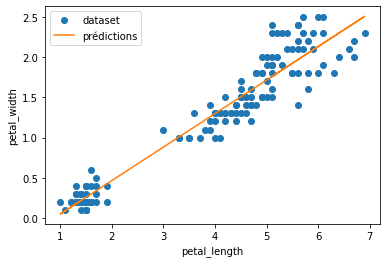

In [71]:
#y = b + w*x
y = b + w*long_petale
plt.plot(long_petale, larg_petale, "o", label="dataset")
plt.plot(long_petale, y, label="prédictions")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()

In [72]:
y_5 = b +w*5 
y_5 

1.715581616210278

In [70]:
print(y)

[0.21647274 0.21647274 0.17483083 0.25811465 0.21647274 0.34139848
 0.21647274 0.25811465 0.21647274 0.25811465 0.25811465 0.29975657
 0.21647274 0.091547   0.13318891 0.25811465 0.17483083 0.21647274
 0.34139848 0.25811465 0.34139848 0.25811465 0.04990509 0.34139848
 0.42468231 0.29975657 0.29975657 0.25811465 0.21647274 0.29975657
 0.29975657 0.25811465 0.25811465 0.21647274 0.25811465 0.13318891
 0.17483083 0.25811465 0.17483083 0.25811465 0.17483083 0.17483083
 0.17483083 0.29975657 0.42468231 0.21647274 0.29975657 0.21647274
 0.25811465 0.21647274 1.59065588 1.50737205 1.6739397  1.29916248
 1.54901396 1.50737205 1.59065588 1.00766909 1.54901396 1.25752057
 1.09095292 1.38244631 1.29916248 1.59065588 1.13259483 1.46573014
 1.50737205 1.3408044  1.50737205 1.25752057 1.63229779 1.29916248
 1.6739397  1.59065588 1.42408822 1.46573014 1.63229779 1.71558162
 1.50737205 1.09095292 1.21587866 1.17423674 1.25752057 1.75722353
 1.50737205 1.50737205 1.59065588 1.46573014 1.3408044  1.2991

# Comprendre la solution

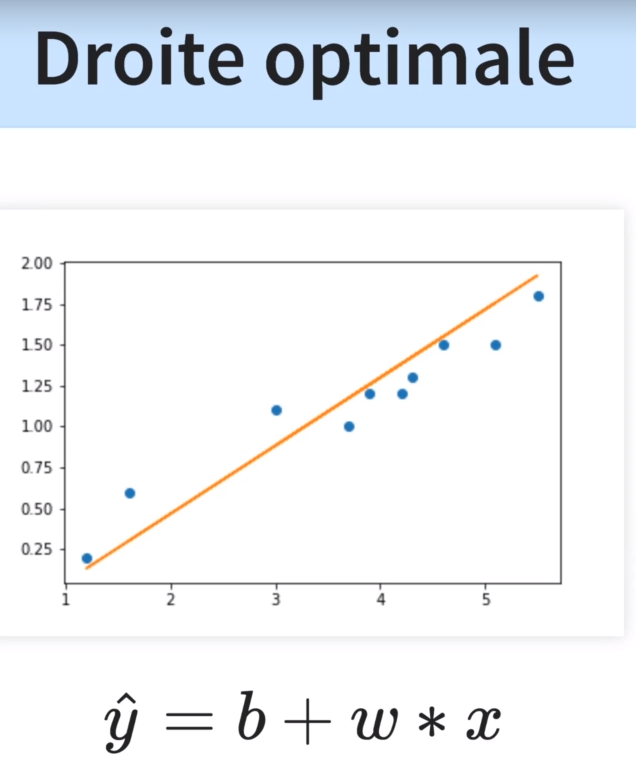

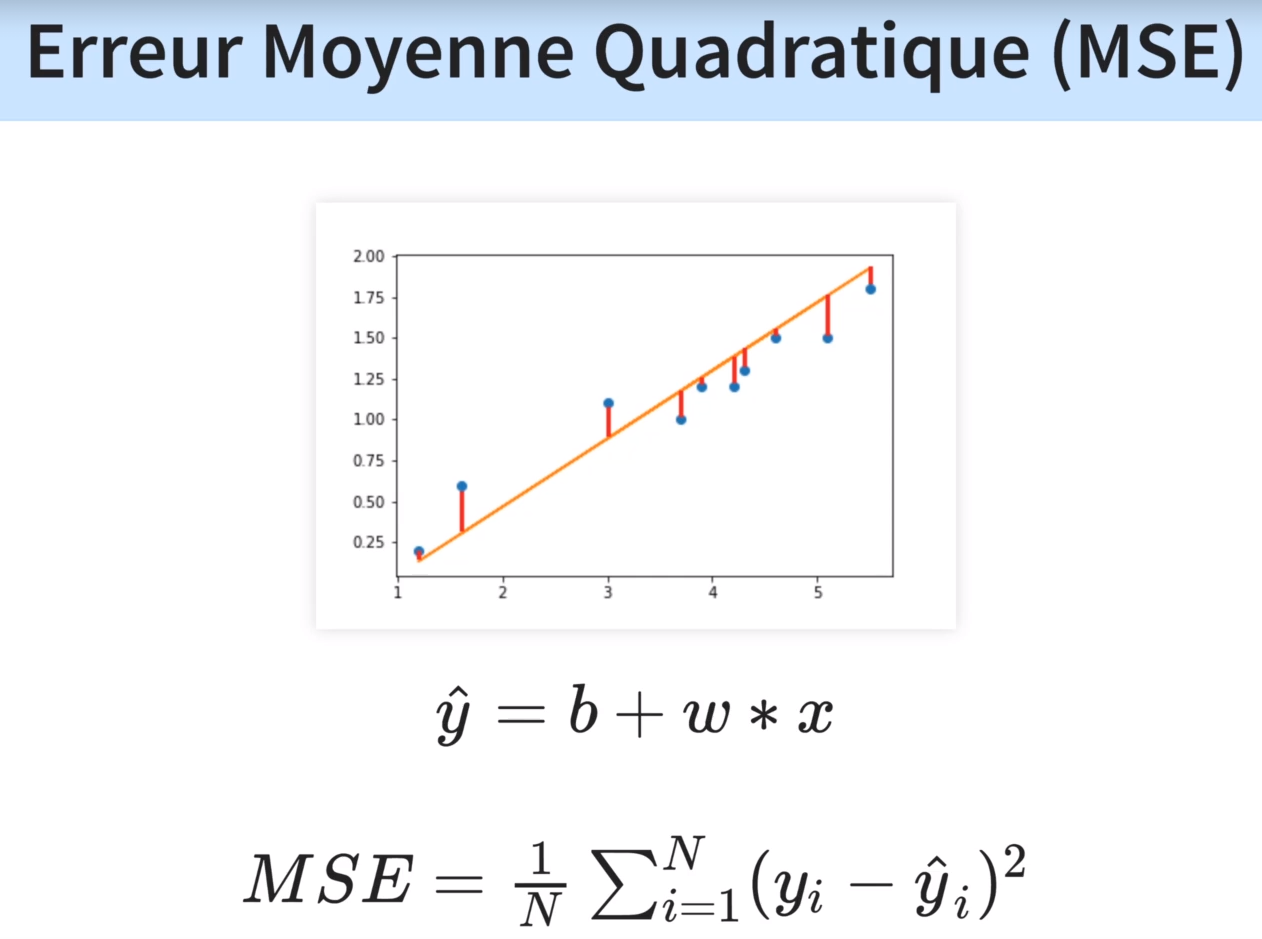

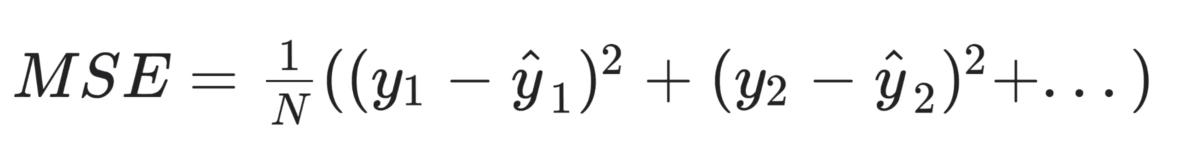

Pour évaluer la précision d’une droite d’estimation, nous devons introduire une métrique de l’erreur. Pour cela on utilise souvent l’erreur quadratique moyenne (ou mean squared error).

L’erreur quadratique moyenne est la moyenne des carrées des différences entre les valeurs prédites et les vraies valeurs.

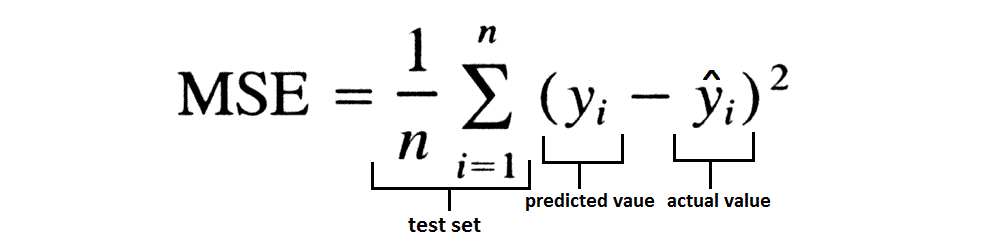

##### Exemple

In [9]:
y = [1,1.5,1.2,0.9,1]
y_pred = [1.1,1.2,1.2,1.3,1.2]

In [ ]:
# L’erreur quadratique moyenne vaudra alors :
MSE = (1/5)*((1-1.1)²+(1.5-1.2)²+(1.2-1.2)²+(0.9-1.3)²+(1-1.2)²)

In [ ]:
MSE = np.mean((y - y_pred)**2)

# Implémentation scikit-learn

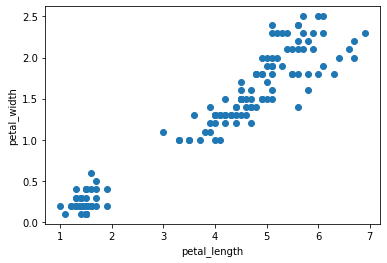

In [5]:
plt.plot(dataset["petal_length"], dataset["petal_width"], "o")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

In [74]:
from sklearn import linear_model

In [80]:
X = dataset["petal_length"].values
Y = dataset["petal_width"].values

In [81]:
X.shape
Y.shape

(150,)

In [82]:
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

In [83]:
X.shape

(150, 1)

In [84]:
X

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [86]:
modele = linear_model.LinearRegression()
modele.fit(X, Y)

LinearRegression()

In [87]:
print(modele.coef_, modele.intercept_)

[[0.41641913]] [-0.36651405]


In [88]:
Y_pred = modele.predict(X)

In [89]:
Y_pred

array([[0.21647274],
       [0.21647274],
       [0.17483083],
       [0.25811465],
       [0.21647274],
       [0.34139848],
       [0.21647274],
       [0.25811465],
       [0.21647274],
       [0.25811465],
       [0.25811465],
       [0.29975657],
       [0.21647274],
       [0.091547  ],
       [0.13318891],
       [0.25811465],
       [0.17483083],
       [0.21647274],
       [0.34139848],
       [0.25811465],
       [0.34139848],
       [0.25811465],
       [0.04990509],
       [0.34139848],
       [0.42468231],
       [0.29975657],
       [0.29975657],
       [0.25811465],
       [0.21647274],
       [0.29975657],
       [0.29975657],
       [0.25811465],
       [0.25811465],
       [0.21647274],
       [0.25811465],
       [0.13318891],
       [0.17483083],
       [0.25811465],
       [0.17483083],
       [0.25811465],
       [0.17483083],
       [0.17483083],
       [0.17483083],
       [0.29975657],
       [0.42468231],
       [0.21647274],
       [0.29975657],
       [0.216

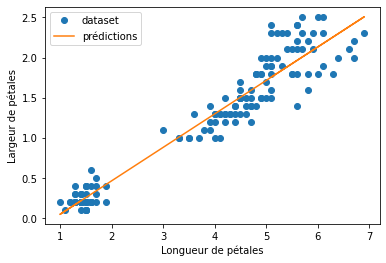

In [91]:
plt.plot(X, Y,"o", label = "dataset")
plt.plot(X, Y_pred , label = "prédictions")
plt.xlabel("Longueur de pétales")
plt.ylabel("Largeur de pétales")
plt.legend()
plt.show()

In [92]:
y_pred = modele.predict([[4]])
y_pred

array([[1.29916248]])

In [94]:
y_pred = modele.predict([[3],[4]])
y_pred

array([[0.88274335],
       [1.29916248]])

In [96]:
from sklearn.metrics import mean_squared_error
erreur = mean_squared_error(Y_pred, Y)
erreur

0.04228994631948424